In [35]:
import random
import matplotlib.pyplot as plt

In [36]:
def read_csv(csv_file):
    with open(csv_file, 'r') as file:
        data_list = []
        for line in file:
            rows = line.split(',')
            data_list.append(rows)
    return data_list

In [37]:
data = read_csv('IRIS.csv')
data[0:4]

[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species\n'],
 ['5.1', '3.5', '1.4', '0.2', 'Iris-setosa\n'],
 ['4.9', '3', '1.4', '0.2', 'Iris-setosa\n'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa\n']]

In [38]:
x = [(float(i[0]),float(i[1])) for i in data[1:]]

def dist(x,y):
    return (sum([(i - j) ** 2 for i, j in zip(x, y)]))**0.5

def mean(l):
    return (sum([i[0] for i in l])/len(l),sum([i[1] for i in l])/len(l))

In [39]:
def k_means(x,n_cluster,n_iter):
    plt.scatter(*zip(*x),c='black',label='data points')
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.legend()
    plt.show()
    centroids = random.sample(x, 1)
    for l in range(n_cluster - 1):
        distance = [[dist(i,j) for j in centroids] for i in x]
        nearest = [centroids[i.index(min(i))] for i in distance]
        w = [dist(x[i],nearest[i] ) for i in range(len(x))]
        centroids.append(x[w.index(max(w))])
    # print('initial centroids are -', centroids, '\n')
    for i in range(n_iter):
        print('iteration -',i,'\n')
        distance = [[dist(i,j) for j in centroids] for i in x]
        nearest = [centroids[i.index(min(i))] for i in distance]
        cluster = {}
        for i in centroids:
            cluster[i] = []
        for i in x:
            cluster[nearest[x.index(i)]].append(i)
        # print(cluster)
        labels=['cluster1','cluster2','cluster3']
        color=['red','green','blue']
        i = 0
        for k, v in cluster.items():
            plt.scatter(*zip(*v),c=color[i],label=labels[i])
            plt.scatter(k[0],k[1],marker = 'D',c='black')
            i = i+1
        plt.xlabel('sepal_length')
        plt.ylabel('sepal_width')
        plt.legend()
        plt.show()
        new_centroids = [mean(cluster[i]) for i in centroids]
        if centroids == new_centroids:
            break
        centroids = new_centroids
    return cluster

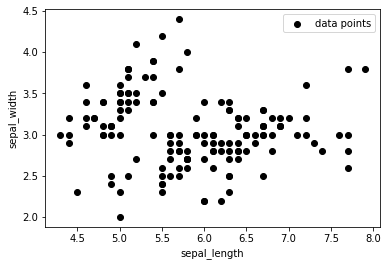

iteration - 0 



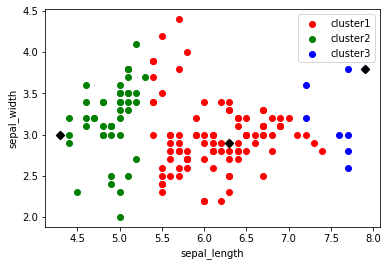

iteration - 1 



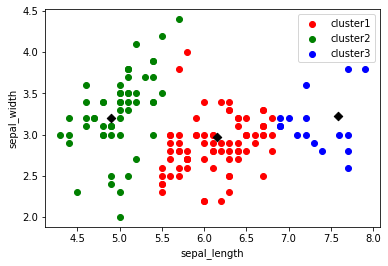

iteration - 2 



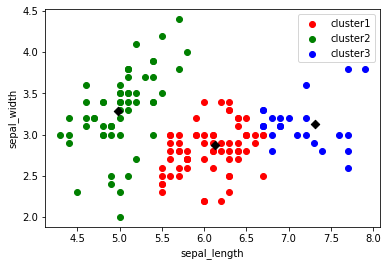

iteration - 3 



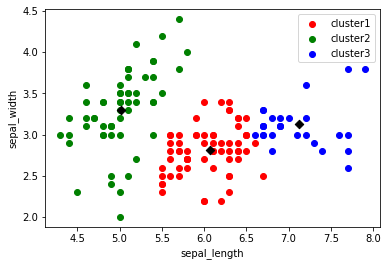

iteration - 4 



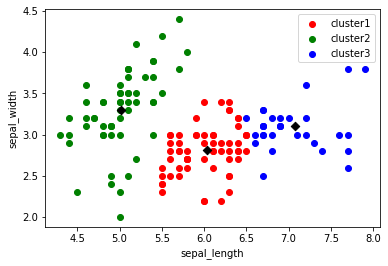

iteration - 5 



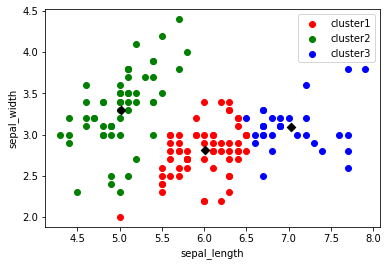

iteration - 6 



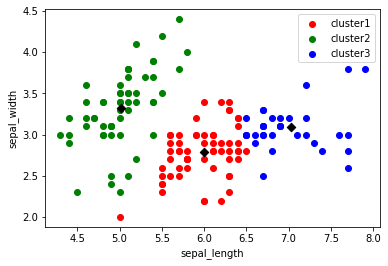

iteration - 7 



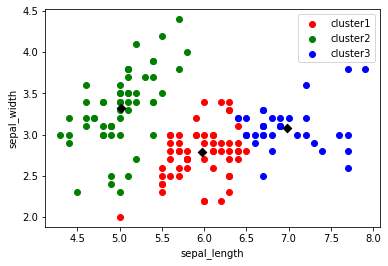

iteration - 8 



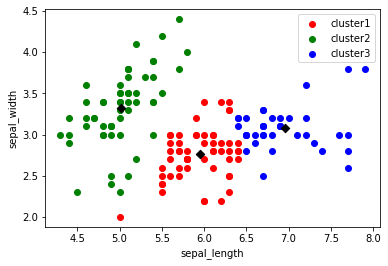

iteration - 9 



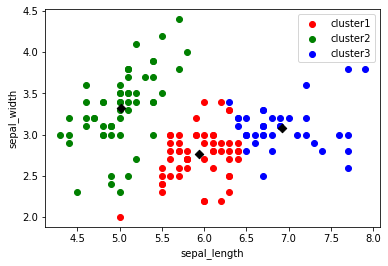

iteration - 10 



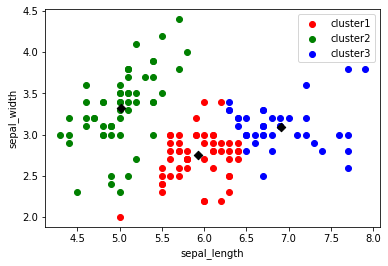

iteration - 11 



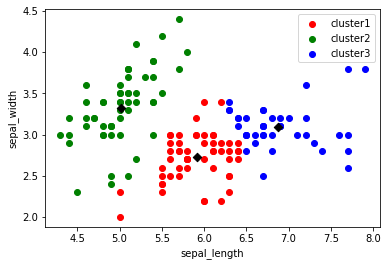

iteration - 12 



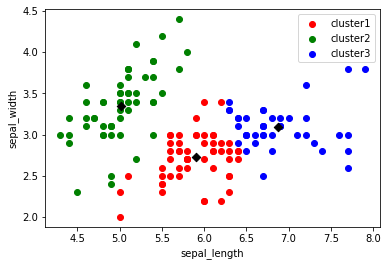

iteration - 13 



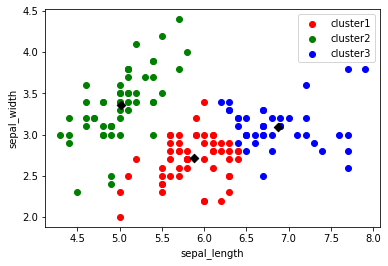

iteration - 14 



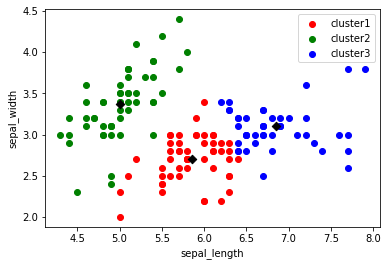

iteration - 15 



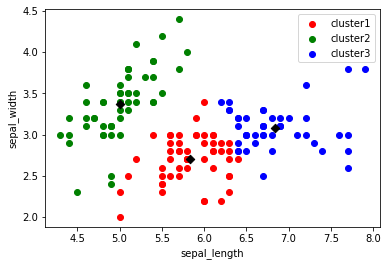

iteration - 16 



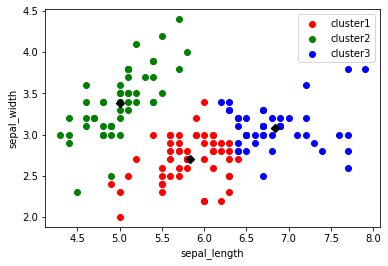

iteration - 17 



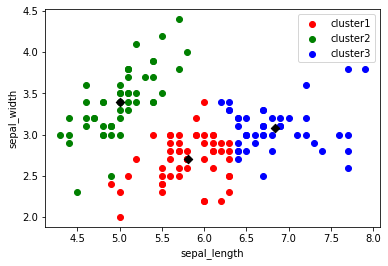

iteration - 18 



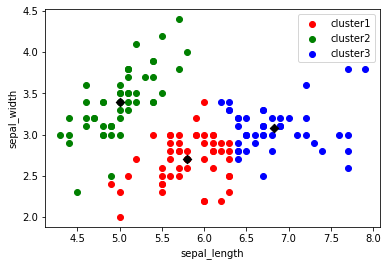

In [40]:
clusters = k_means(x,3,100)

In [41]:
print ('The final clusters are -')
for k, v in clusters.items():
    print(v)

The final clusters are -
[(5.5, 2.3), (5.7, 2.8), (4.9, 2.4), (5.2, 2.7), (5.0, 2.0), (5.9, 3.0), (6.0, 2.2), (6.1, 2.9), (5.6, 2.9), (5.6, 3.0), (5.8, 2.7), (6.2, 2.2), (5.6, 2.5), (5.9, 3.2), (6.1, 2.8), (6.3, 2.5), (6.1, 2.8), (6.0, 2.9), (5.7, 2.6), (5.5, 2.4), (5.5, 2.4), (5.8, 2.7), (6.0, 2.7), (5.4, 3.0), (6.0, 3.4), (6.3, 2.3), (5.6, 3.0), (5.5, 2.5), (5.5, 2.6), (6.1, 3.0), (5.8, 2.6), (5.0, 2.3), (5.6, 2.7), (5.7, 3.0), (5.7, 2.9), (6.2, 2.9), (5.1, 2.5), (5.7, 2.8), (5.8, 2.7), (6.3, 2.9), (5.7, 2.5), (5.8, 2.8), (6.0, 2.2), (5.6, 2.8), (6.3, 2.7), (6.2, 2.8), (6.1, 3.0), (6.3, 2.8), (6.1, 2.6), (6.0, 3.0), (5.8, 2.7), (6.3, 2.5), (5.9, 3.0)]
[(5.1, 3.5), (4.9, 3.0), (4.7, 3.2), (4.6, 3.1), (5.0, 3.6), (5.4, 3.9), (4.6, 3.4), (5.0, 3.4), (4.4, 2.9), (4.9, 3.1), (5.4, 3.7), (4.8, 3.4), (4.8, 3.0), (4.3, 3.0), (5.8, 4.0), (5.7, 4.4), (5.4, 3.9), (5.1, 3.5), (5.7, 3.8), (5.1, 3.8), (5.4, 3.4), (5.1, 3.7), (4.6, 3.6), (5.1, 3.3), (4.8, 3.4), (5.0, 3.0), (5.0, 3.4), (5.2, 3.5), (